C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/100
3847/3847 [==============================] - 1s 260us/step - loss: 0.0079 - val_loss: 0.0037

Epoch 00001: val_loss improved from inf to 0.00367, saving model to DNNmodel.h5

Epoch 00001: loss improved from inf to 0.00789, saving model to DNNmodel2.h5
Epoch 2/100
3847/3847 [==============================] - 0s 51us/step - loss: 0.0040 - val_loss: 0.0043

Epoch 00002: val_loss did not improve from 0.00367

Epoch 00002: loss improved from 0.00789 to 0.00400, saving model to DNNmodel2.h5
Epoch 3/100
3847/3847 [==============================] - 0s 51us/step - loss: 0.0036 - val_loss: 0.0036

Epoch 00003: val_loss improved from 0.00367 to 0.00356, saving model to DNNmodel.h5

Epoch 00003: loss improved from 0.00400 to 0.00364, saving model to DNNmodel2.h5
Epoch 4/100
3847/3847 [==============================] - 0s 51us/step - loss: 0.0034 - val_loss: 0.0029

Epoch 00004: val_loss improved from 0.00356 t

3847/3847 [==============================] - 0s 48us/step - loss: 0.0026 - val_loss: 0.0053

Epoch 00037: val_loss did not improve from 0.00246

Epoch 00037: loss did not improve from 0.00255
Epoch 38/100
3847/3847 [==============================] - 0s 45us/step - loss: 0.0026 - val_loss: 0.0039

Epoch 00038: val_loss did not improve from 0.00246

Epoch 00038: loss did not improve from 0.00255
Epoch 39/100
3847/3847 [==============================] - 0s 54us/step - loss: 0.0026 - val_loss: 0.0030

Epoch 00039: val_loss did not improve from 0.00246

Epoch 00039: loss did not improve from 0.00255
Epoch 40/100
3847/3847 [==============================] - 0s 61us/step - loss: 0.0027 - val_loss: 0.0032

Epoch 00040: val_loss did not improve from 0.00246

Epoch 00040: loss did not improve from 0.00255
Epoch 41/100
3847/3847 [==============================] - 0s 47us/step - loss: 0.0026 - val_loss: 0.0038

Epoch 00041: val_loss did not improve from 0.00246

Epoch 00041: loss did not improve f

3847/3847 [==============================] - 0s 58us/step - loss: 0.0023 - val_loss: 0.0044

Epoch 00076: val_loss did not improve from 0.00246

Epoch 00076: loss improved from 0.00235 to 0.00229, saving model to DNNmodel2.h5
Epoch 77/100
3847/3847 [==============================] - 0s 44us/step - loss: 0.0024 - val_loss: 0.0036

Epoch 00077: val_loss did not improve from 0.00246

Epoch 00077: loss did not improve from 0.00229
Epoch 78/100
3847/3847 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 0.0043

Epoch 00078: val_loss did not improve from 0.00246

Epoch 00078: loss did not improve from 0.00229
Epoch 79/100
3847/3847 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 0.0030

Epoch 00079: val_loss did not improve from 0.00246

Epoch 00079: loss did not improve from 0.00229
Epoch 80/100
3847/3847 [==============================] - 0s 43us/step - loss: 0.0023 - val_loss: 0.0036

Epoch 00080: val_loss did not improve from 0.00246

E

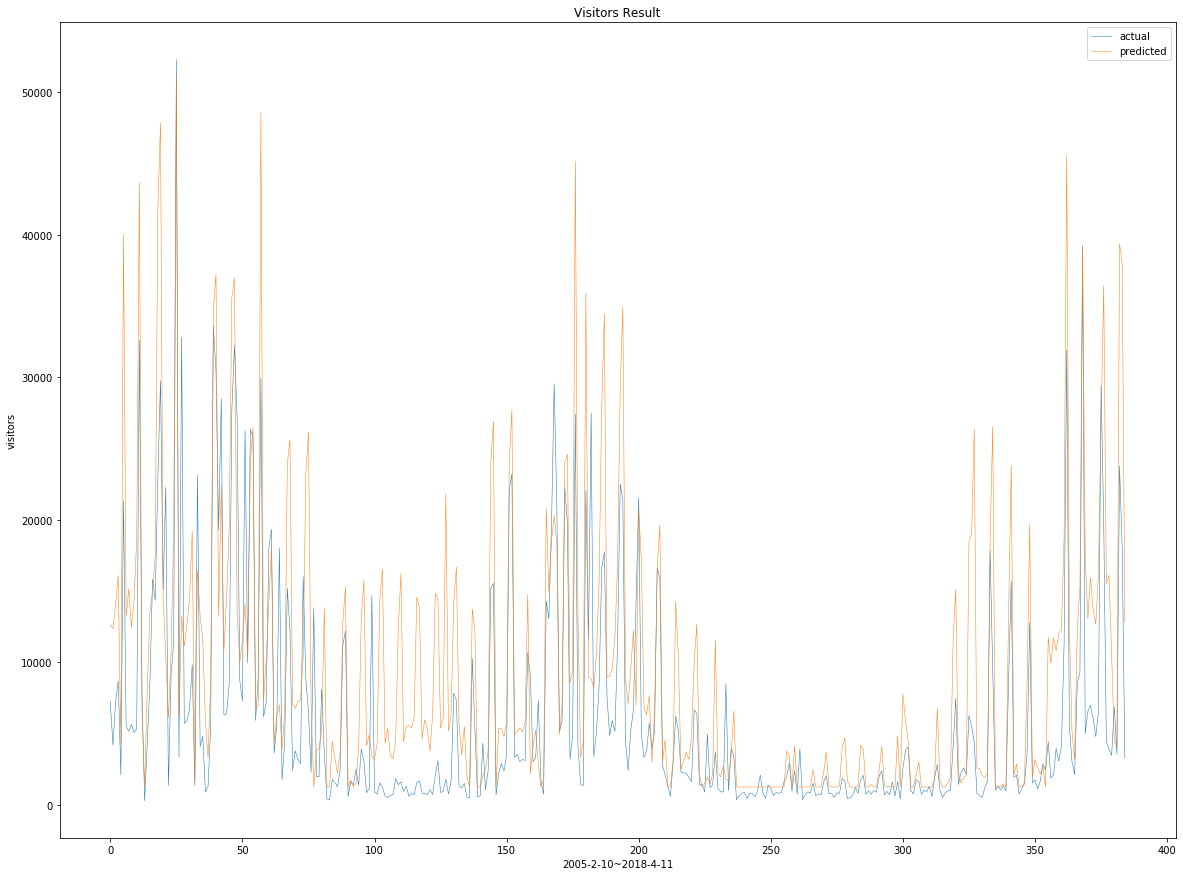

mae :  4263.003286386465
mse :  39968462.58827364
rmse :  6322.06157738705
std : 5480.176363633587


In [3]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')
mcp_save2 = ModelCheckpoint('DNNmodel2.h5', save_best_only=True, monitor='loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=100, callbacks=[early_stop, mcp_save, mcp_save2])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/100
3847/3847 [==============================] - 3s 817us/step - loss: 0.0156 - val_loss: 0.0048

Epoch 00001: val_loss improved from inf to 0.00478, saving model to DNNmodel.h5

Epoch 00001: loss improved from inf to 0.01558, saving model to DNNmodel2.h5
Epoch 2/100
3847/3847 [==============================] - 0s 79us/step - loss: 0.0041 - val_loss: 0.0023

Epoch 00002: val_loss improved from 0.00478 to 0.00235, saving model to DNNmodel.h5

Epoch 00002: loss improved from 0.01558 to 0.00408, saving model to DNNmodel2.h5
Epoch 3/100
3847/3847 [==============================] - 0s 74us/step - loss: 0.0038 - val_loss: 0.0035

Epoch 00003: val_loss did not improve from 0.00235

Epoch 00003: loss improved from 0.00408 to 0.00382, saving model to DNNmodel2.h5
Epoch 4/100
3847/3847 [==============================] - 0s 92us/step - loss: 0.0036 - val_loss: 0.0040

Epoch 00004: val_loss did not improve from 0.

3847/3847 [==============================] - 0s 80us/step - loss: 0.0024 - val_loss: 0.0038

Epoch 00076: val_loss did not improve from 0.00235

Epoch 00076: loss improved from 0.00243 to 0.00237, saving model to DNNmodel2.h5
Epoch 77/100
3847/3847 [==============================] - 0s 82us/step - loss: 0.0024 - val_loss: 0.0034

Epoch 00077: val_loss did not improve from 0.00235

Epoch 00077: loss improved from 0.00237 to 0.00237, saving model to DNNmodel2.h5
Epoch 78/100
3847/3847 [==============================] - 0s 78us/step - loss: 0.0024 - val_loss: 0.0031

Epoch 00078: val_loss did not improve from 0.00235

Epoch 00078: loss did not improve from 0.00237
Epoch 79/100
3847/3847 [==============================] - 0s 84us/step - loss: 0.0024 - val_loss: 0.0036

Epoch 00079: val_loss did not improve from 0.00235

Epoch 00079: loss did not improve from 0.00237
Epoch 80/100
3847/3847 [==============================] - 0s 84us/step - loss: 0.0024 - val_loss: 0.0048

Epoch 00080: val_lo

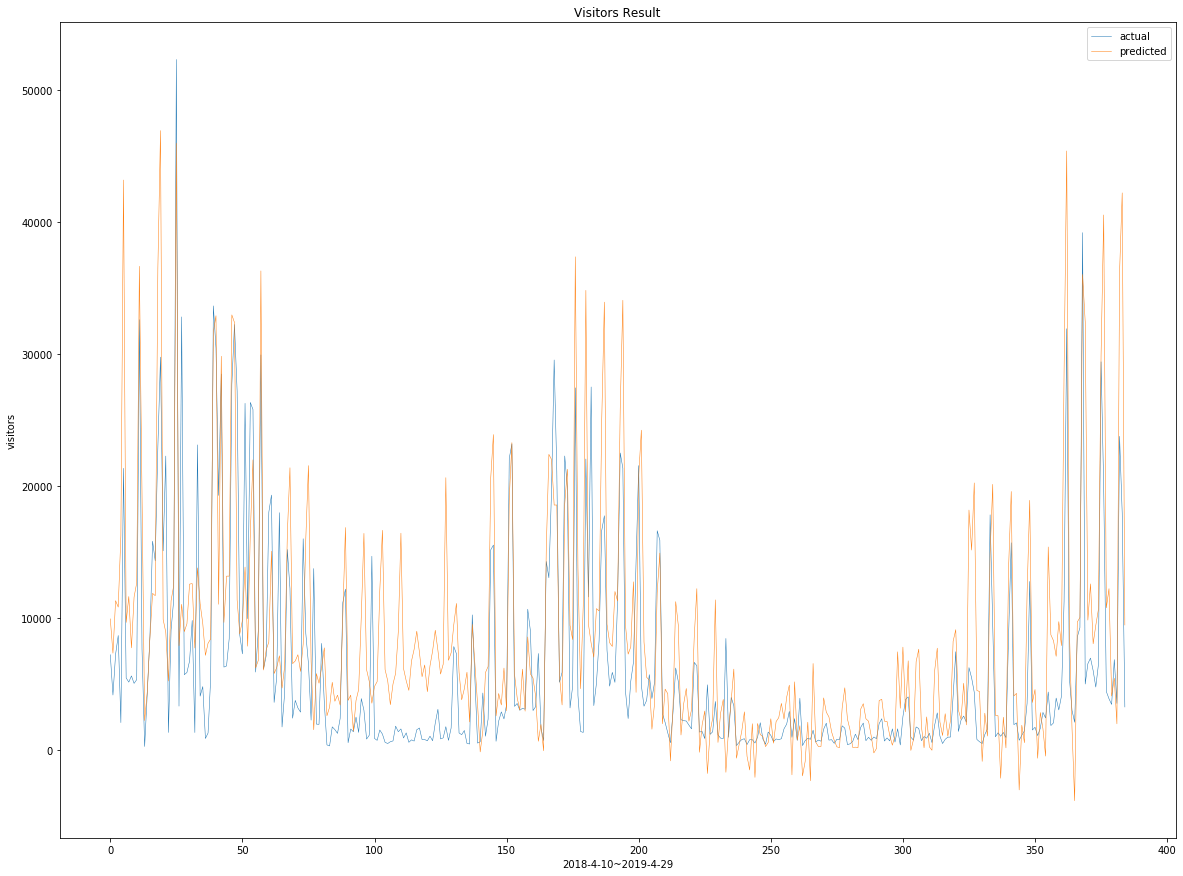

mae :  4134.8278204224325
mse :  35906340.38745053
rmse :  5992.189949213103
std : 5524.338953422365


In [6]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')
mcp_save2 = ModelCheckpoint('DNNmodel2.h5', save_best_only=True, monitor='loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=100, callbacks=[early_stop, mcp_save, mcp_save2])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/100
3847/3847 [==============================] - 3s 736us/step - loss: 0.0238 - val_loss: 0.0045

Epoch 00001: val_loss improved from inf to 0.00448, saving model to DNNmodel.h5

Epoch 00001: loss improved from inf to 0.02382, saving model to DNNmodel2.h5
Epoch 2/100
3847/3847 [==============================] - 0s 80us/step - loss: 0.0042 - val_loss: 0.0044

Epoch 00002: val_loss improved from 0.00448 to 0.00444, saving model to DNNmodel.h5

Epoch 00002: loss improved from 0.02382 to 0.00423, saving model to DNNmodel2.h5
Epoch 3/100
3847/3847 [==============================] - 0s 85us/step - loss: 0.0040 - val_loss: 0.0032

Epoch 00003: val_loss improved from 0.00444 to 0.00316, saving model to DNNmodel.h5

Epoch 00003: loss improved from 0.00423 to 0.00400, saving model to DNNmodel2.h5
Epoch 4/100
3847/3847 [==============================] - 0s 83us/step - loss: 0.0036 - val_loss: 0.0030

Epoch 00004:

Epoch 38/100
3847/3847 [==============================] - 0s 83us/step - loss: 0.0028 - val_loss: 0.0026

Epoch 00038: val_loss improved from 0.00266 to 0.00259, saving model to DNNmodel.h5

Epoch 00038: loss did not improve from 0.00272
Epoch 39/100
3847/3847 [==============================] - 0s 84us/step - loss: 0.0028 - val_loss: 0.0034

Epoch 00039: val_loss did not improve from 0.00259

Epoch 00039: loss did not improve from 0.00272
Epoch 40/100
3847/3847 [==============================] - 0s 84us/step - loss: 0.0028 - val_loss: 0.0049

Epoch 00040: val_loss did not improve from 0.00259

Epoch 00040: loss did not improve from 0.00272
Epoch 41/100
3847/3847 [==============================] - 0s 83us/step - loss: 0.0027 - val_loss: 0.0046

Epoch 00041: val_loss did not improve from 0.00259

Epoch 00041: loss improved from 0.00272 to 0.00270, saving model to DNNmodel2.h5
Epoch 42/100
3847/3847 [==============================] - 0s 82us/step - loss: 0.0027 - val_loss: 0.0046

Epoch 0

3847/3847 [==============================] - 0s 83us/step - loss: 0.0026 - val_loss: 0.0050

Epoch 00076: val_loss did not improve from 0.00259

Epoch 00076: loss did not improve from 0.00248
Epoch 77/100
3847/3847 [==============================] - 0s 83us/step - loss: 0.0025 - val_loss: 0.0031

Epoch 00077: val_loss did not improve from 0.00259

Epoch 00077: loss did not improve from 0.00248
Epoch 78/100
3847/3847 [==============================] - 0s 82us/step - loss: 0.0025 - val_loss: 0.0037

Epoch 00078: val_loss did not improve from 0.00259

Epoch 00078: loss improved from 0.00248 to 0.00247, saving model to DNNmodel2.h5
Epoch 79/100
3847/3847 [==============================] - 0s 85us/step - loss: 0.0024 - val_loss: 0.0046

Epoch 00079: val_loss did not improve from 0.00259

Epoch 00079: loss improved from 0.00247 to 0.00243, saving model to DNNmodel2.h5
Epoch 80/100
3847/3847 [==============================] - 0s 84us/step - loss: 0.0024 - val_loss: 0.0038

Epoch 00080: val_lo

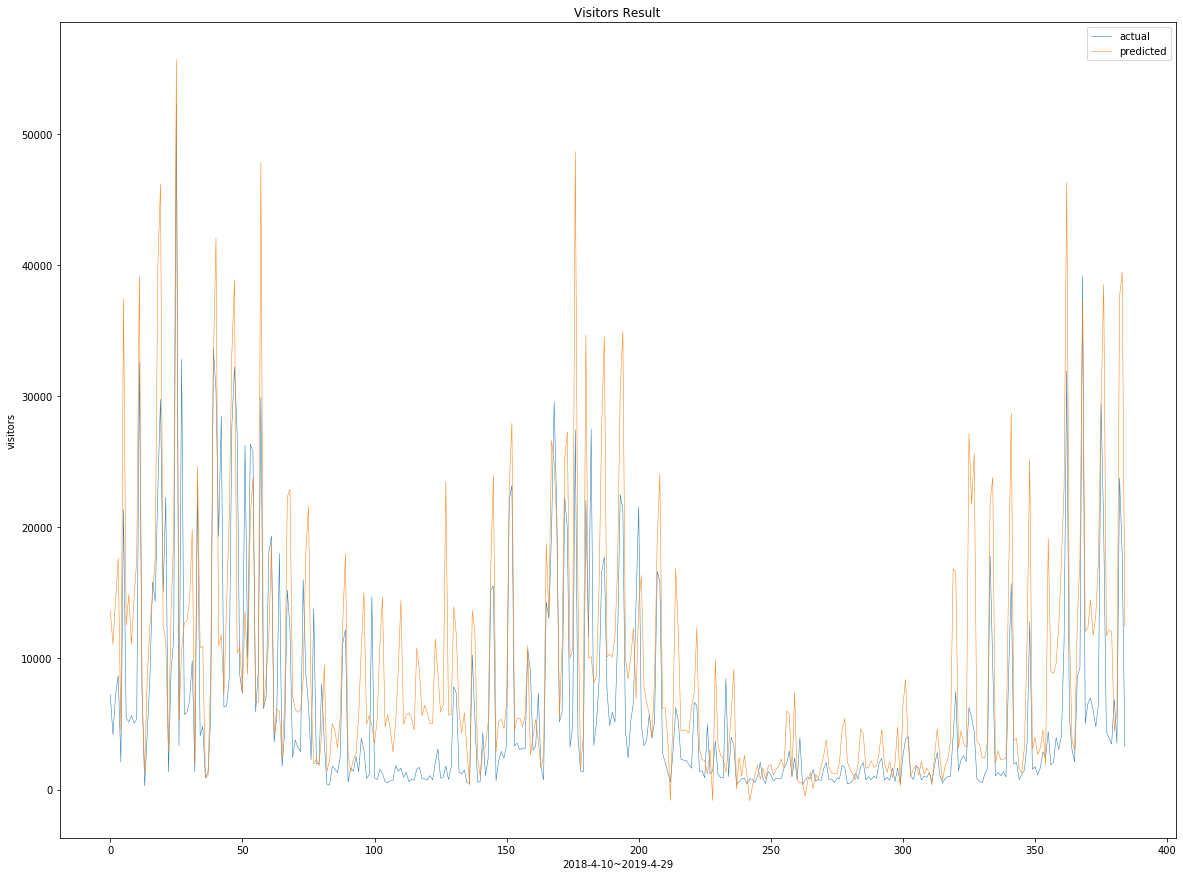

mae :  4498.083331665435
mse :  41157200.064512424
rmse :  6415.387756364569
std : 5529.725312184292


In [7]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=100, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 2s 610us/step - loss: 0.0075 - val_loss: 0.0055

Epoch 00001: val_loss improved from inf to 0.00548, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 109us/step - loss: 0.0043 - val_loss: 0.0050

Epoch 00002: val_loss improved from 0.00548 to 0.00505, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 0s 103us/step - loss: 0.0037 - val_loss: 0.0038

Epoch 00003: val_loss improved from 0.00505 to 0.00384, saving model to DNNmodel.h5
Epoch 4/70
3847/3847 [==============================] - 0s 111us/step - loss: 0.0034 - val_loss: 0.0027

Epoch 00004: val_loss improved from 0.00384 to 0.00271, saving model to DNNmodel.h5
Epoch 5/70
3847/3847 [==============================] - 0s 100us/step - loss: 0.0034 - val_loss: 0.0032

Epoch 00005: val_loss did not improve from 0.00271
Epoch 6/70
3847

3847/3847 [==============================] - 0s 88us/step - loss: 0.0025 - val_loss: 0.0042

Epoch 00052: val_loss did not improve from 0.00229
Epoch 53/70
3847/3847 [==============================] - 0s 107us/step - loss: 0.0025 - val_loss: 0.0043

Epoch 00053: val_loss did not improve from 0.00229
Epoch 54/70
3847/3847 [==============================] - 0s 100us/step - loss: 0.0025 - val_loss: 0.0043

Epoch 00054: val_loss did not improve from 0.00229
Epoch 55/70
3847/3847 [==============================] - 0s 99us/step - loss: 0.0025 - val_loss: 0.0032

Epoch 00055: val_loss did not improve from 0.00229
Epoch 56/70
3847/3847 [==============================] - 0s 94us/step - loss: 0.0025 - val_loss: 0.0040

Epoch 00056: val_loss did not improve from 0.00229
Epoch 57/70
3847/3847 [==============================] - 0s 107us/step - loss: 0.0026 - val_loss: 0.0040

Epoch 00057: val_loss did not improve from 0.00229
Epoch 58/70
3847/3847 [==============================] - 0s 101us/step - 

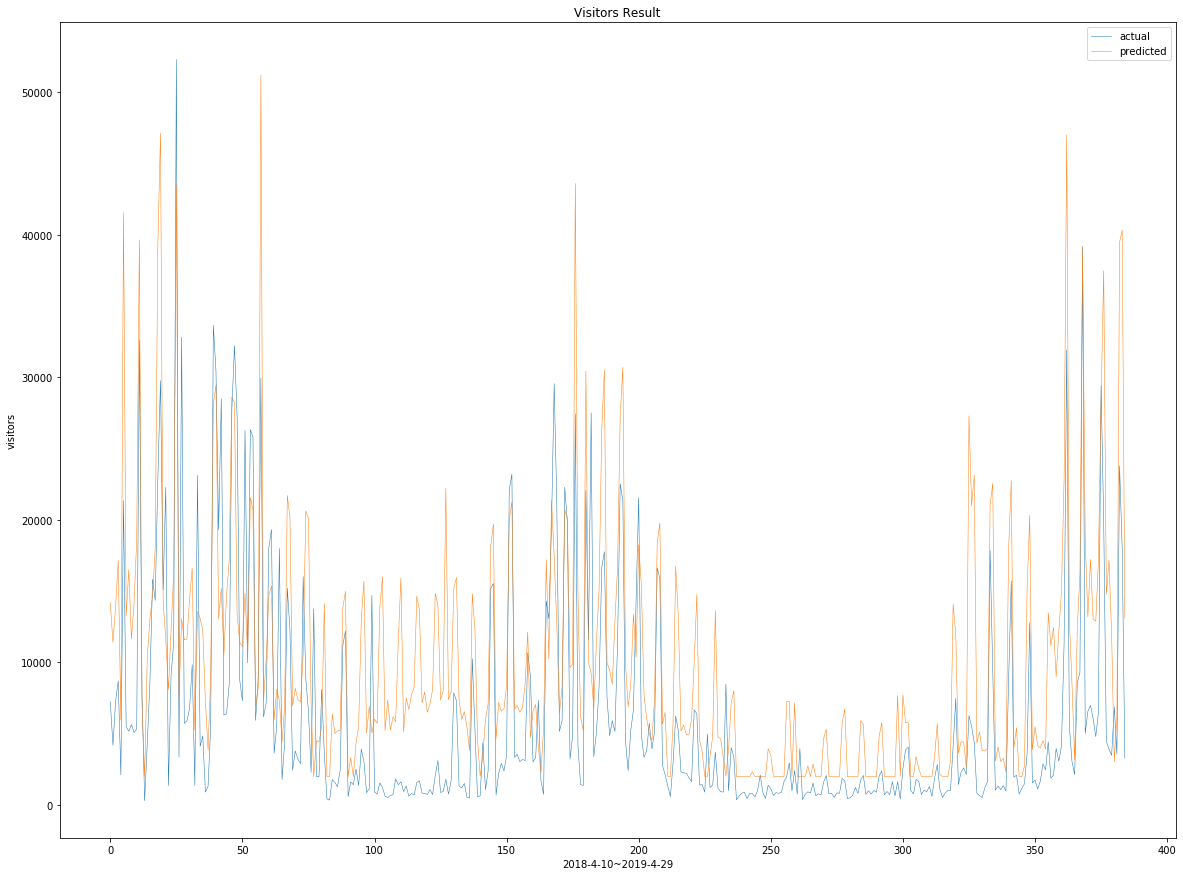

mae :  5020.567099038657
mse :  43569114.844639115
rmse :  6600.690482414632
std : 5439.9013141201585


In [8]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 2s 554us/step - loss: 0.0091 - val_loss: 0.0041

Epoch 00001: val_loss improved from inf to 0.00406, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 122us/step - loss: 0.0048 - val_loss: 0.0033

Epoch 00002: val_loss improved from 0.00406 to 0.00327, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 0s 116us/step - loss: 0.0042 - val_loss: 0.0040

Epoch 00003: val_loss did not improve from 0.00327
Epoch 4/70
3847/3847 [==============================] - 0s 115us/step - loss: 0.0037 - val_loss: 0.0019

Epoch 00004: val_loss improved from 0.00327 to 0.00193, saving model to DNNmodel.h5
Epoch 5/70
3847/3847 [==============================] - 0s 103us/step - loss: 0.0036 - val_loss: 0.0033

Epoch 00005: val_loss did not improve from 0.00193
Epoch 6/70
3847/3847 [==========================

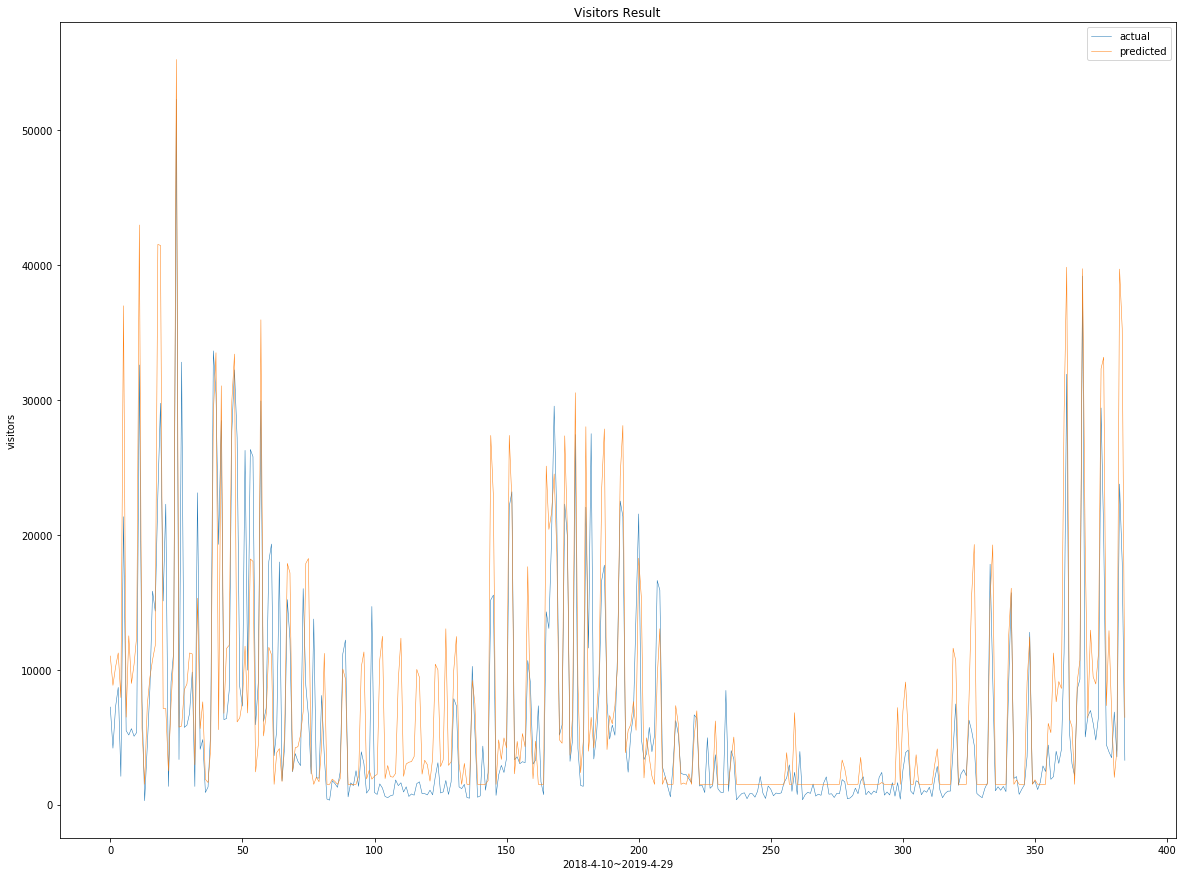

mae :  3027.862561510755
mse :  25081596.01116865
rmse :  5008.152954050889
std : 4874.721552094836


In [9]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 2s 570us/step - loss: 0.0092 - val_loss: 0.0029

Epoch 00001: val_loss improved from inf to 0.00293, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 122us/step - loss: 0.0044 - val_loss: 0.0037

Epoch 00002: val_loss did not improve from 0.00293
Epoch 3/70
3847/3847 [==============================] - 0s 121us/step - loss: 0.0039 - val_loss: 0.0036

Epoch 00003: val_loss did not improve from 0.00293
Epoch 4/70
3847/3847 [==============================] - 0s 122us/step - loss: 0.0034 - val_loss: 0.0034

Epoch 00004: val_loss did not improve from 0.00293
Epoch 5/70
3847/3847 [==============================] - 0s 126us/step - loss: 0.0034 - val_loss: 0.0037

Epoch 00005: val_loss did not improve from 0.00293
Epoch 6/70
3847/3847 [==============================] - 0s 126us/step - loss: 0.0033 - val_loss: 0.0051

Epoch 000

3847/3847 [==============================] - 0s 109us/step - loss: 0.0025 - val_loss: 0.0048

Epoch 00052: val_loss did not improve from 0.00219
Epoch 53/70
3847/3847 [==============================] - 0s 123us/step - loss: 0.0025 - val_loss: 0.0038

Epoch 00053: val_loss did not improve from 0.00219
Epoch 54/70
3847/3847 [==============================] - 0s 107us/step - loss: 0.0025 - val_loss: 0.0033

Epoch 00054: val_loss did not improve from 0.00219
Epoch 55/70
3847/3847 [==============================] - 0s 110us/step - loss: 0.0026 - val_loss: 0.0045

Epoch 00055: val_loss did not improve from 0.00219
Epoch 56/70
3847/3847 [==============================] - 0s 112us/step - loss: 0.0025 - val_loss: 0.0070

Epoch 00056: val_loss did not improve from 0.00219
Epoch 57/70
3847/3847 [==============================] - 0s 119us/step - loss: 0.0026 - val_loss: 0.0035

Epoch 00057: val_loss did not improve from 0.00219
Epoch 58/70
3847/3847 [==============================] - 0s 110us/step

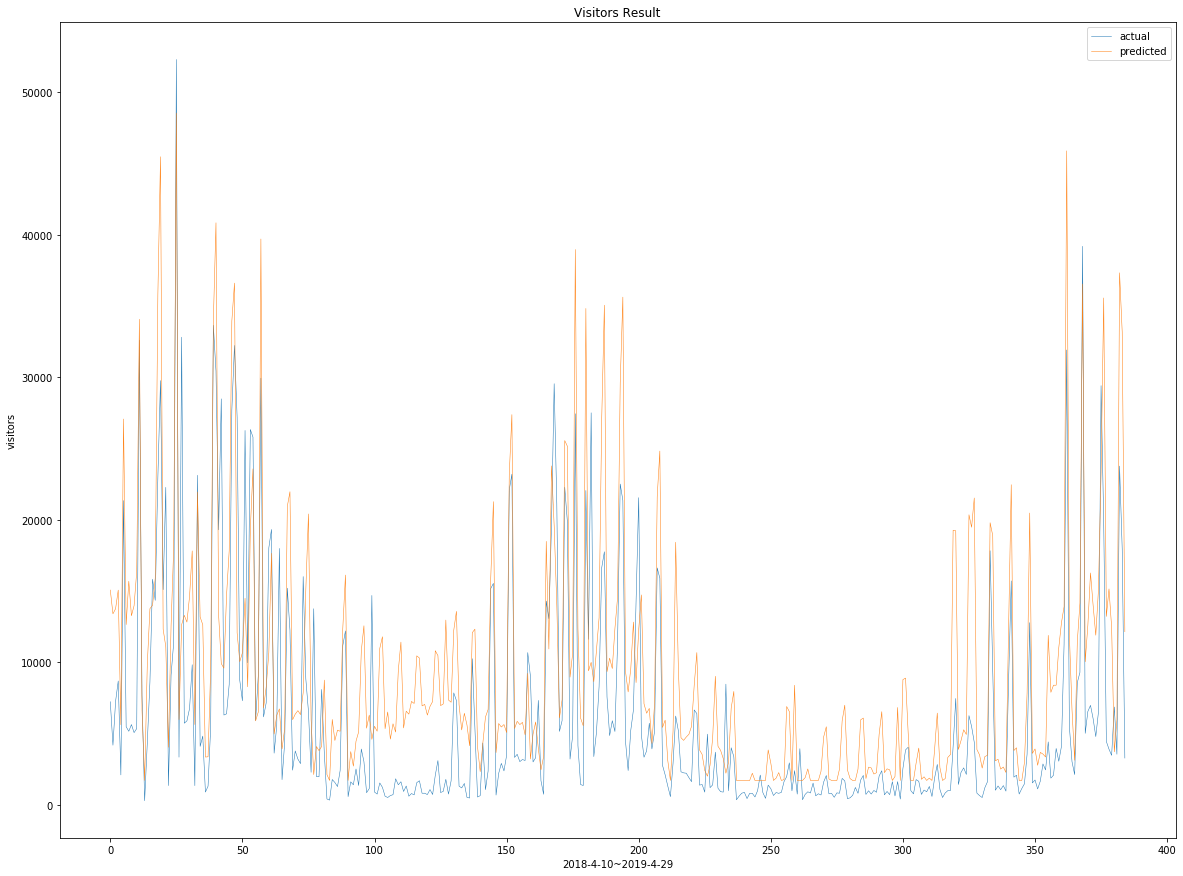

mae :  4505.753592671977
mse :  34184211.69893228
rmse :  5846.726579799357
std : 4886.502206288334


In [10]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 3s 903us/step - loss: 0.0088 - val_loss: 0.0085

Epoch 00001: val_loss improved from inf to 0.00848, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 1s 133us/step - loss: 0.0044 - val_loss: 0.0050

Epoch 00002: val_loss improved from 0.00848 to 0.00503, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 1s 140us/step - loss: 0.0038 - val_loss: 0.0041

Epoch 00003: val_loss improved from 0.00503 to 0.00409, saving model to DNNmodel.h5
Epoch 4/70
3847/3847 [==============================] - 1s 140us/step - loss: 0.0041 - val_loss: 0.0033

Epoch 00004: val_loss improved from 0.00409 to 0.00334, saving model to DNNmodel.h5
Epoch 5/70
3847/3847 [==============================] - 1s 133us/step - loss: 0.0037 - val_loss: 0.0033

Epoch 00005: val_loss improved from 0.00334 to 0.00329, saving mod


Epoch 00051: val_loss did not improve from 0.00249
Epoch 52/70
3847/3847 [==============================] - 0s 124us/step - loss: 0.0025 - val_loss: 0.0043

Epoch 00052: val_loss did not improve from 0.00249
Epoch 53/70
3847/3847 [==============================] - 1s 134us/step - loss: 0.0026 - val_loss: 0.0034

Epoch 00053: val_loss did not improve from 0.00249
Epoch 54/70
3847/3847 [==============================] - 1s 133us/step - loss: 0.0026 - val_loss: 0.0039

Epoch 00054: val_loss did not improve from 0.00249
Epoch 55/70
3847/3847 [==============================] - 1s 135us/step - loss: 0.0026 - val_loss: 0.0043

Epoch 00055: val_loss did not improve from 0.00249
Epoch 56/70
3847/3847 [==============================] - 1s 144us/step - loss: 0.0025 - val_loss: 0.0032

Epoch 00056: val_loss did not improve from 0.00249
Epoch 57/70
3847/3847 [==============================] - 1s 145us/step - loss: 0.0025 - val_loss: 0.0036

Epoch 00057: val_loss did not improve from 0.00249
Epoch 

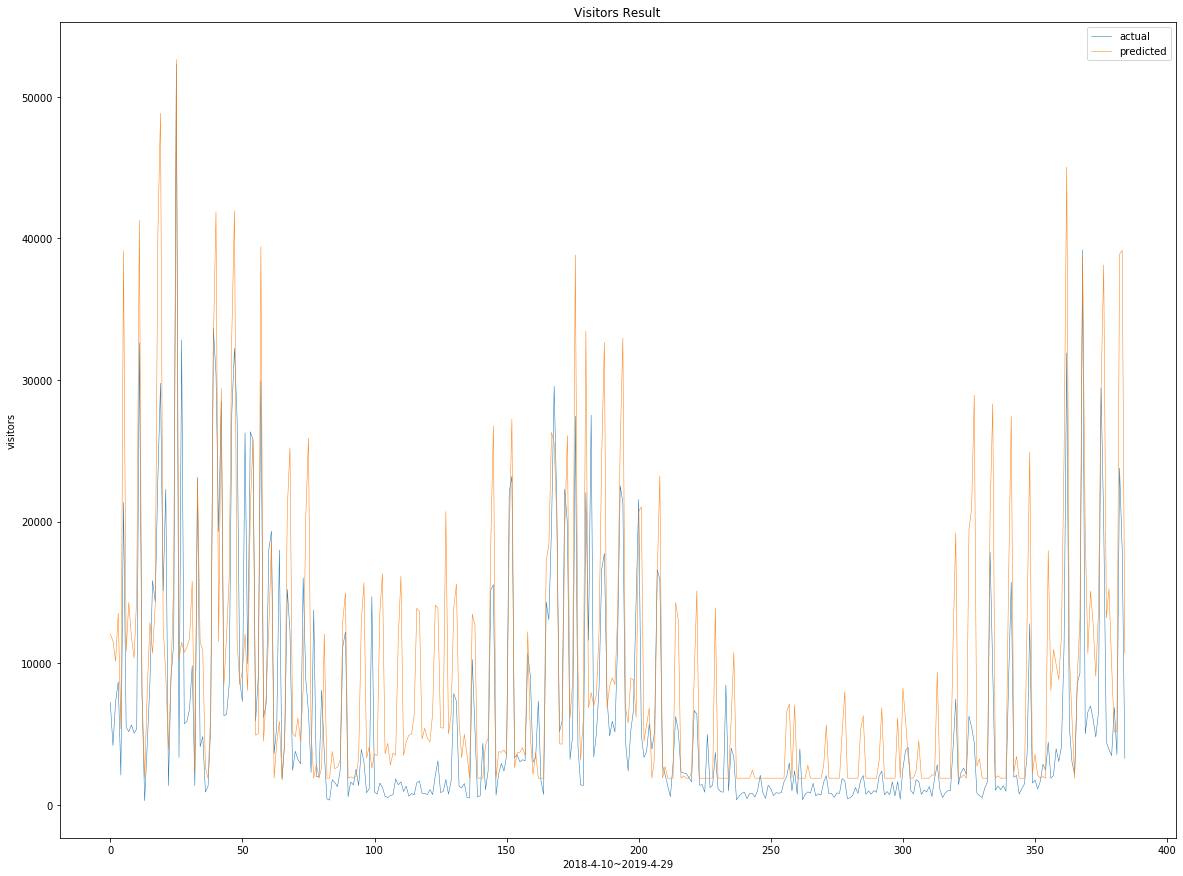

mae :  4129.588146497058
mse :  38107116.78672601
rmse :  6173.096207473686
std : 5461.4063406808355


In [11]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 5s 1ms/step - loss: 0.0069 - val_loss: 0.0033

Epoch 00001: val_loss improved from inf to 0.00332, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 1s 148us/step - loss: 0.0039 - val_loss: 0.0069

Epoch 00002: val_loss did not improve from 0.00332
Epoch 3/70
3847/3847 [==============================] - 1s 150us/step - loss: 0.0038 - val_loss: 0.0037

Epoch 00003: val_loss did not improve from 0.00332
Epoch 4/70
3847/3847 [==============================] - 1s 156us/step - loss: 0.0036 - val_loss: 0.0032

Epoch 00004: val_loss improved from 0.00332 to 0.00318, saving model to DNNmodel.h5
Epoch 5/70
3847/3847 [==============================] - 1s 142us/step - loss: 0.0037 - val_loss: 0.0052

Epoch 00005: val_loss did not improve from 0.00318
Epoch 6/70
3847/3847 [==============================] - 1s 155us/step - loss: 0.003

3847/3847 [==============================] - 0s 126us/step - loss: 0.0025 - val_loss: 0.0047

Epoch 00052: val_loss did not improve from 0.00251
Epoch 53/70
3847/3847 [==============================] - 0s 122us/step - loss: 0.0025 - val_loss: 0.0042

Epoch 00053: val_loss did not improve from 0.00251
Epoch 54/70
3847/3847 [==============================] - 1s 145us/step - loss: 0.0025 - val_loss: 0.0031

Epoch 00054: val_loss did not improve from 0.00251
Epoch 55/70
3847/3847 [==============================] - 1s 130us/step - loss: 0.0025 - val_loss: 0.0048

Epoch 00055: val_loss did not improve from 0.00251
Epoch 56/70
3847/3847 [==============================] - 0s 125us/step - loss: 0.0024 - val_loss: 0.0031

Epoch 00056: val_loss did not improve from 0.00251
Epoch 57/70
3847/3847 [==============================] - 1s 153us/step - loss: 0.0025 - val_loss: 0.0047

Epoch 00057: val_loss did not improve from 0.00251
Epoch 58/70
3847/3847 [==============================] - 0s 119us/step

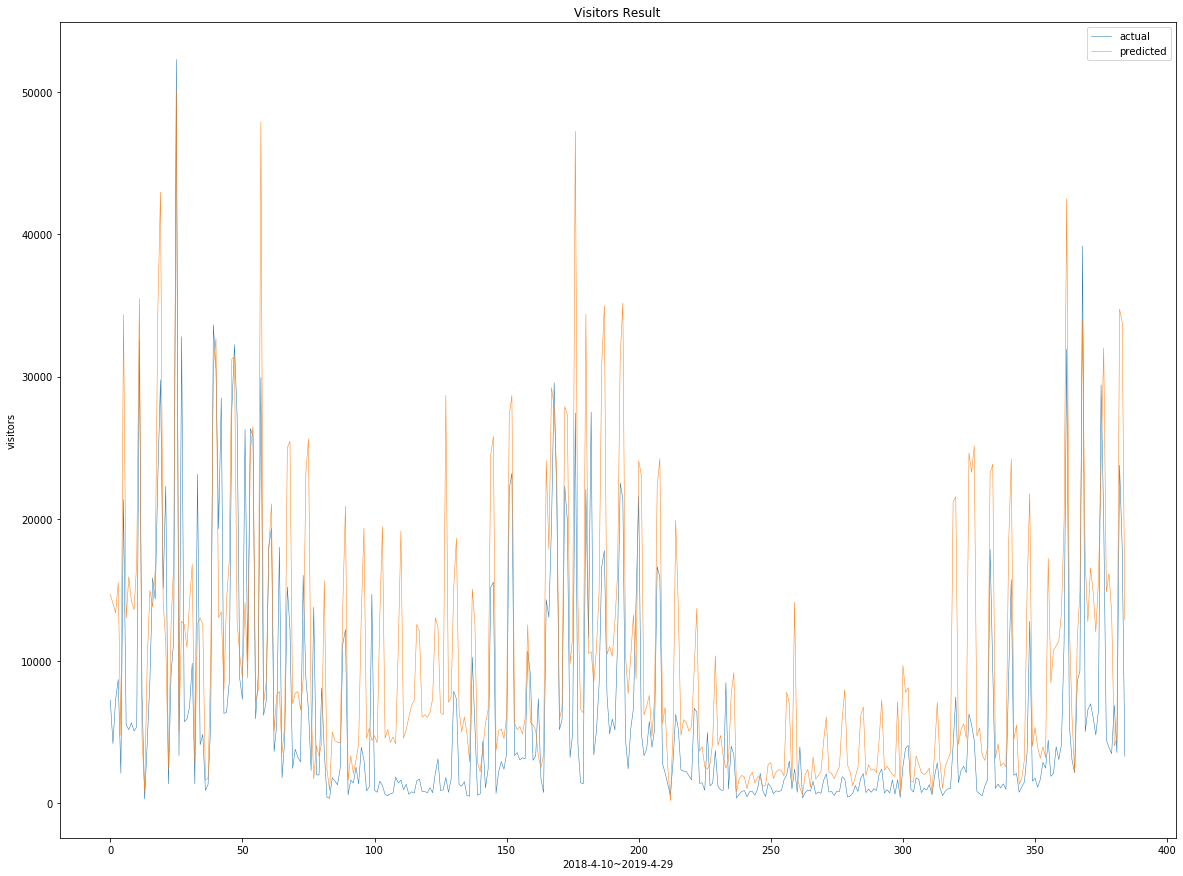

mae :  5005.2565371823
mse :  45664150.82920384
rmse :  6757.525496008419
std : 5501.186463367149


In [12]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

Using TensorFlow backend.
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s




학습 데이터 수: 4809
테스트 데이터 수: 385



Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 1s 215us/step - loss: 0.0119 - val_loss: 0.0038

Epoch 00001: val_loss improved from inf to 0.00380, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 72us/step - loss: 0.0040 - val_loss: 0.0049

Epoch 00002: val_loss did not improve from 0.00380
Epoch 3/70
3847/3847 [==============================] - 0s 71us/step - loss: 0.0037 - val_loss: 0.0050

Epoch 00003: val_loss did not improve from 0.00380
Epoch 4/70
3847/3847 [==============================] - 0s 64us/step - loss: 0.0039 - val_loss: 0.0054

Epoch 00004: val_loss did not improve from 0.00380
Epoch 5/70
3847/3847 [==============================] - 0s 62us/step - loss: 0.0036 - val_loss: 0.0048

Epoch 00005: val_loss did not improve from 0.00380
Epoch 6/70
3847/3847 [==============================] - 0s 62us/step - loss: 0.0035 - val_loss: 0.0069

Epoch 00

3847/3847 [==============================] - 0s 59us/step - loss: 0.0027 - val_loss: 0.0044

Epoch 00045: val_loss did not improve from 0.00289
Epoch 46/70
3847/3847 [==============================] - 0s 62us/step - loss: 0.0027 - val_loss: 0.0052

Epoch 00046: val_loss did not improve from 0.00289
Epoch 47/70
3847/3847 [==============================] - 0s 72us/step - loss: 0.0028 - val_loss: 0.0037

Epoch 00047: val_loss did not improve from 0.00289
Epoch 48/70
3847/3847 [==============================] - 0s 77us/step - loss: 0.0027 - val_loss: 0.0042

Epoch 00048: val_loss did not improve from 0.00289
Epoch 49/70
3847/3847 [==============================] - 0s 88us/step - loss: 0.0027 - val_loss: 0.0039

Epoch 00049: val_loss did not improve from 0.00289
Epoch 50/70
3847/3847 [==============================] - 0s 79us/step - loss: 0.0026 - val_loss: 0.0046

Epoch 00050: val_loss did not improve from 0.00289
Epoch 51/70
3847/3847 [==============================] - 0s 82us/step - loss

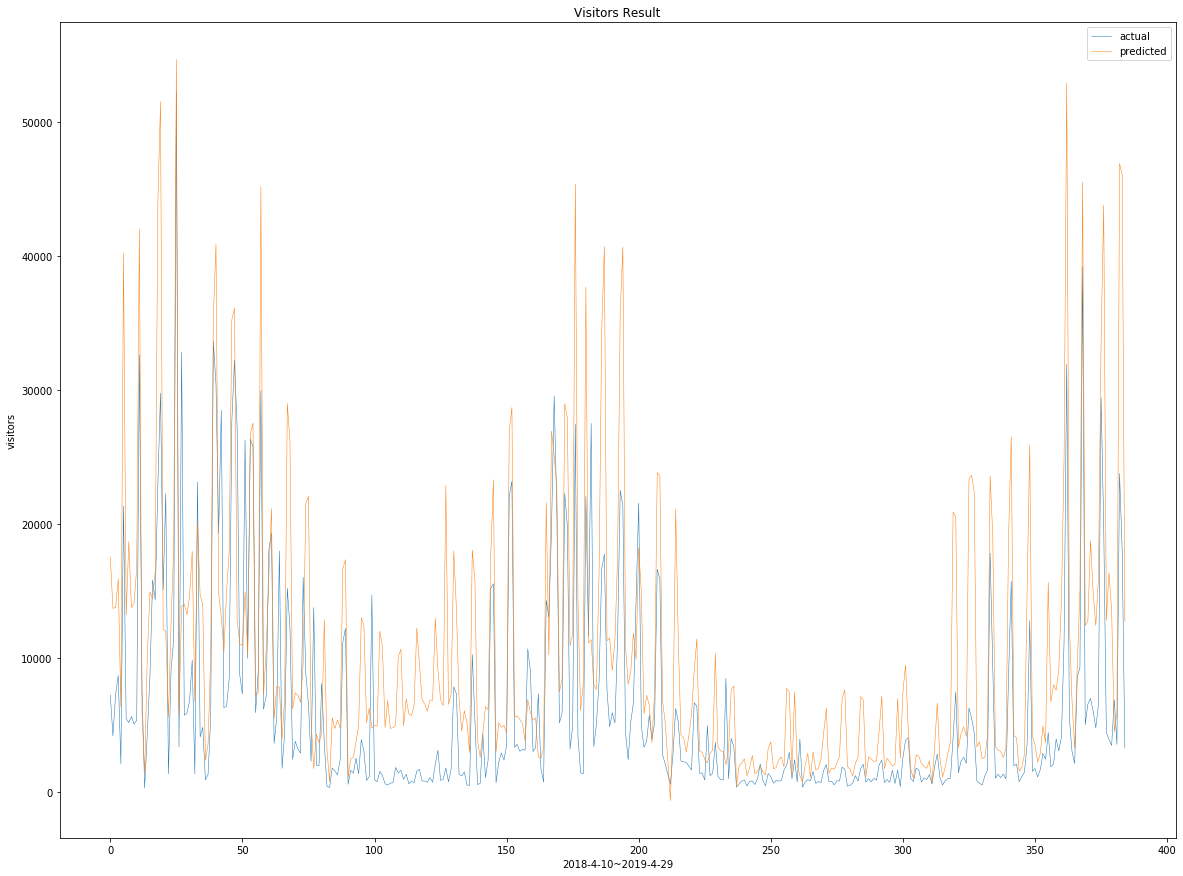

mae :  5120.963193898387
mse :  49608982.34140631
rmse :  7043.36441918252
std : 5699.119453691064


In [1]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

# x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
# x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(combinedInput)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 1s 230us/step - loss: 0.0147 - val_loss: 0.0051

Epoch 00001: val_loss improved from inf to 0.00506, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 78us/step - loss: 0.0041 - val_loss: 0.0039

Epoch 00002: val_loss improved from 0.00506 to 0.00387, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 0s 82us/step - loss: 0.0039 - val_loss: 0.0030

Epoch 00003: val_loss improved from 0.00387 to 0.00298, saving model to DNNmodel.h5
Epoch 4/70
3847/3847 [==============================] - 0s 81us/step - loss: 0.0037 - val_loss: 0.0036

Epoch 00004: val_loss did not improve from 0.00298
Epoch 5/70
3847/3847 [==============================] - 0s 80us/step - loss: 0.0038 - val_loss: 0.0055

Epoch 00005: val_loss did not improve from 0.00298
Epoch 6/70
3847/3847 [==============================

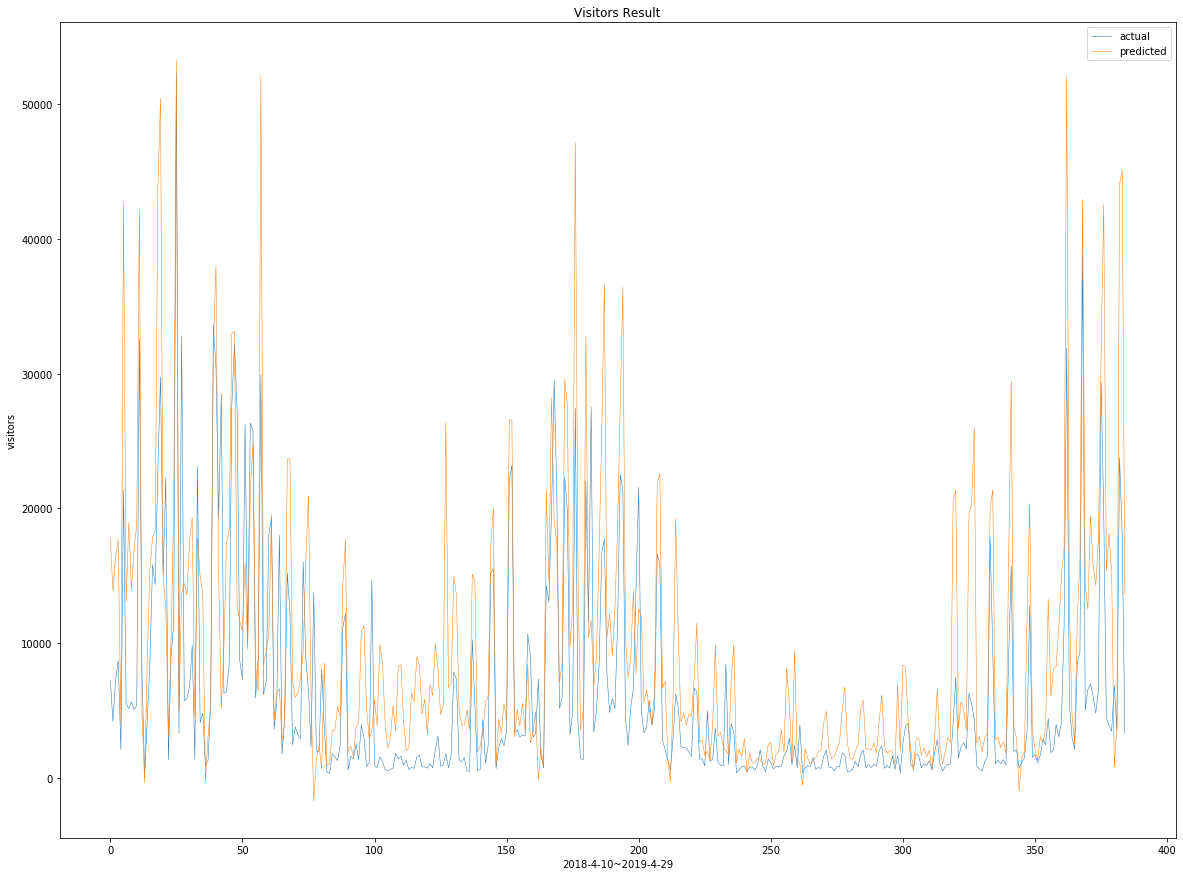

mae :  4722.620667772169
mse :  46584767.67970275
rmse :  6825.3034862709765
std : 5906.1223826256455


In [2]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

# x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
# x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(combinedInput)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 1s 243us/step - loss: 0.0069 - val_loss: 0.0052

Epoch 00001: val_loss improved from inf to 0.00523, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 45us/step - loss: 0.0043 - val_loss: 0.0047

Epoch 00002: val_loss improved from 0.00523 to 0.00473, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 0s 39us/step - loss: 0.0038 - val_loss: 0.0052

Epoch 00003: val_loss did not improve from 0.00473
Epoch 4/70
3847/3847 [==============================] - 0s 38us/step - loss: 0.0036 - val_loss: 0.0048

Epoch 00004: val_loss did not improve from 0.00473
Epoch 5/70
3847/3847 [==============================] - 0s 40us/step - loss: 0.0037 - val_loss: 0.0030

Epoch 00005: val_loss improved from 0.00473 to 0.00301, saving model to DNNmodel.h5
Epoch 6/70
3847/3847 [==============================

3847/3847 [==============================] - 0s 33us/step - loss: 0.0026 - val_loss: 0.0035

Epoch 00052: val_loss did not improve from 0.00285
Epoch 53/70
3847/3847 [==============================] - 0s 41us/step - loss: 0.0026 - val_loss: 0.0043

Epoch 00053: val_loss did not improve from 0.00285
Epoch 54/70
3847/3847 [==============================] - 0s 43us/step - loss: 0.0025 - val_loss: 0.0044

Epoch 00054: val_loss did not improve from 0.00285
Epoch 55/70
3847/3847 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0047

Epoch 00055: val_loss did not improve from 0.00285
Epoch 56/70
3847/3847 [==============================] - 0s 35us/step - loss: 0.0025 - val_loss: 0.0027

Epoch 00056: val_loss improved from 0.00285 to 0.00275, saving model to DNNmodel.h5
Epoch 57/70
3847/3847 [==============================] - 0s 35us/step - loss: 0.0025 - val_loss: 0.0040

Epoch 00057: val_loss did not improve from 0.00275
Epoch 58/70
3847/3847 [====================

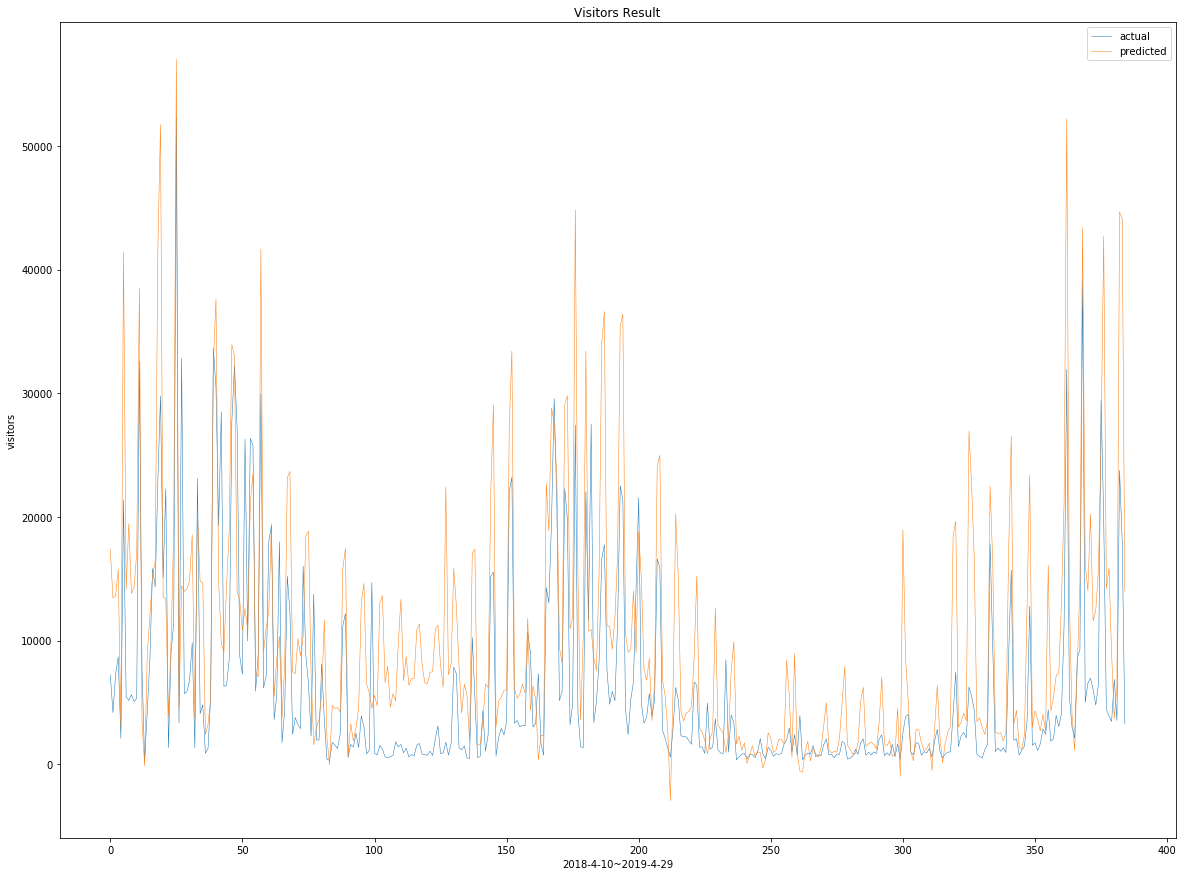

mae :  4991.634014397163
mse :  47861825.90578568
rmse :  6918.224187303103
std : 5748.03581076795


In [3]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 1s 318us/step - loss: 0.0098 - val_loss: 0.0031

Epoch 00001: val_loss improved from inf to 0.00305, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 43us/step - loss: 0.0047 - val_loss: 0.0041

Epoch 00002: val_loss did not improve from 0.00305
Epoch 3/70
3847/3847 [==============================] - 0s 46us/step - loss: 0.0039 - val_loss: 0.0035

Epoch 00003: val_loss did not improve from 0.00305
Epoch 4/70
3847/3847 [==============================] - 0s 39us/step - loss: 0.0037 - val_loss: 0.0044

Epoch 00004: val_loss did not improve from 0.00305
Epoch 5/70
3847/3847 [==============================] - 0s 37us/step - loss: 0.0036 - val_loss: 0.0042

Epoch 00005: val_loss did not improve from 0.00305
Epoch 6/70
3847/3847 [==============================] - 0s 37us/step - loss: 0.0035 - val_loss: 0.0031

Epoch 00006: v

3847/3847 [==============================] - 0s 36us/step - loss: 0.0026 - val_loss: 0.0066

Epoch 00052: val_loss did not improve from 0.00235
Epoch 53/70
3847/3847 [==============================] - 0s 34us/step - loss: 0.0027 - val_loss: 0.0039

Epoch 00053: val_loss did not improve from 0.00235
Epoch 54/70
3847/3847 [==============================] - 0s 34us/step - loss: 0.0027 - val_loss: 0.0036

Epoch 00054: val_loss did not improve from 0.00235
Epoch 55/70
3847/3847 [==============================] - 0s 35us/step - loss: 0.0026 - val_loss: 0.0038

Epoch 00055: val_loss did not improve from 0.00235
Epoch 56/70
3847/3847 [==============================] - 0s 36us/step - loss: 0.0025 - val_loss: 0.0039

Epoch 00056: val_loss did not improve from 0.00235
Epoch 57/70
3847/3847 [==============================] - 0s 38us/step - loss: 0.0026 - val_loss: 0.0051

Epoch 00057: val_loss did not improve from 0.00235
Epoch 58/70
3847/3847 [==============================] - 0s 38us/step - loss

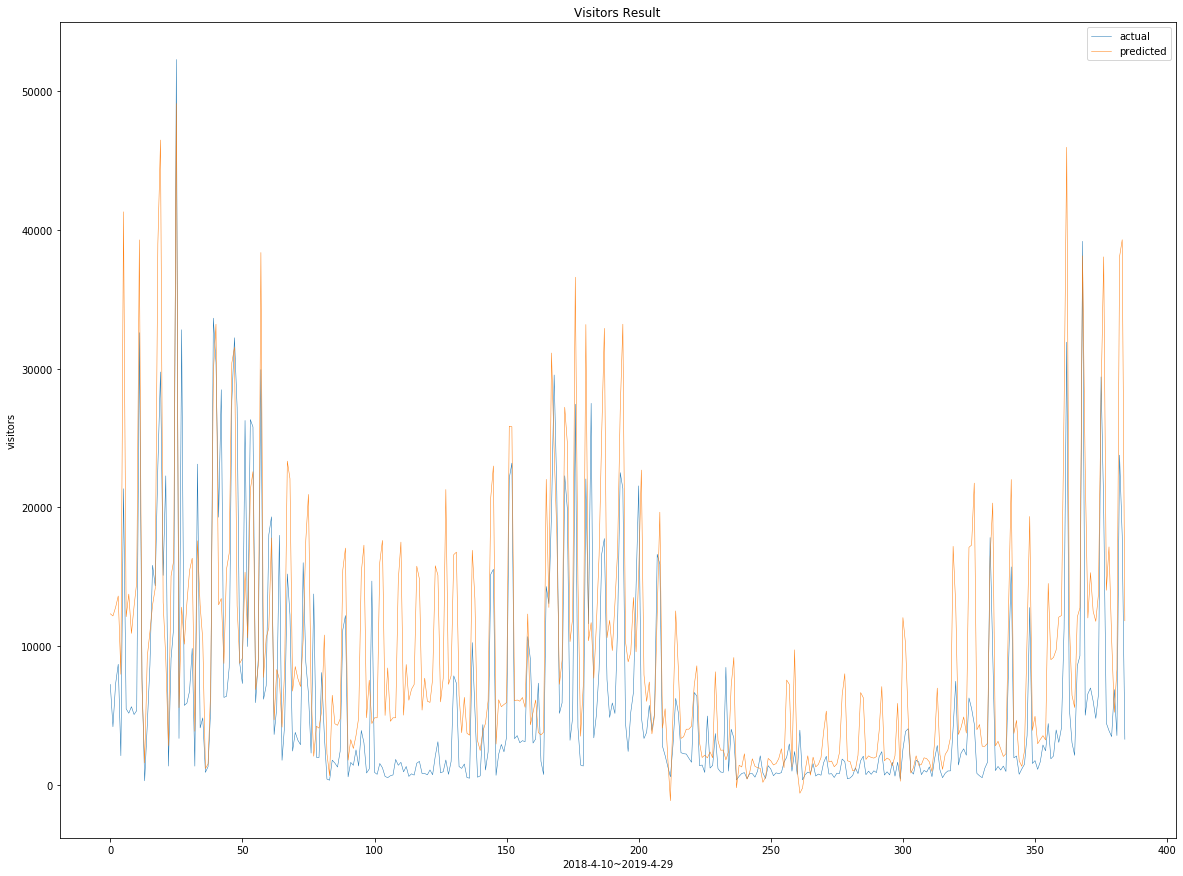

mae :  4622.102718283913
mse :  39841836.27880694
rmse :  6312.038995349042
std : 5309.7325805154405


In [4]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 1s 346us/step - loss: 0.0187 - val_loss: 0.0039

Epoch 00001: val_loss improved from inf to 0.00391, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 40us/step - loss: 0.0049 - val_loss: 0.0038

Epoch 00002: val_loss improved from 0.00391 to 0.00377, saving model to DNNmodel.h5
Epoch 3/70
3847/3847 [==============================] - 0s 39us/step - loss: 0.0041 - val_loss: 0.0050

Epoch 00003: val_loss did not improve from 0.00377
Epoch 4/70
3847/3847 [==============================] - 0s 40us/step - loss: 0.0036 - val_loss: 0.0032

Epoch 00004: val_loss improved from 0.00377 to 0.00321, saving model to DNNmodel.h5
Epoch 5/70
3847/3847 [==============================] - 0s 38us/step - loss: 0.0035 - val_loss: 0.0025

Epoch 00005: val_loss improved from 0.00321 to 0.00247, saving model to DNNmodel.h5
Epoch 6/70
3847/384

3847/3847 [==============================] - 0s 35us/step - loss: 0.0026 - val_loss: 0.0034

Epoch 00052: val_loss did not improve from 0.00247
Epoch 53/70
3847/3847 [==============================] - 0s 36us/step - loss: 0.0026 - val_loss: 0.0042

Epoch 00053: val_loss did not improve from 0.00247
Epoch 54/70
3847/3847 [==============================] - 0s 35us/step - loss: 0.0025 - val_loss: 0.0035

Epoch 00054: val_loss did not improve from 0.00247
Epoch 55/70
3847/3847 [==============================] - 0s 35us/step - loss: 0.0025 - val_loss: 0.0035

Epoch 00055: val_loss did not improve from 0.00247
Epoch 56/70
3847/3847 [==============================] - 0s 37us/step - loss: 0.0026 - val_loss: 0.0047

Epoch 00056: val_loss did not improve from 0.00247
Epoch 57/70
3847/3847 [==============================] - 0s 36us/step - loss: 0.0026 - val_loss: 0.0037

Epoch 00057: val_loss did not improve from 0.00247
Epoch 58/70
3847/3847 [==============================] - 0s 33us/step - loss

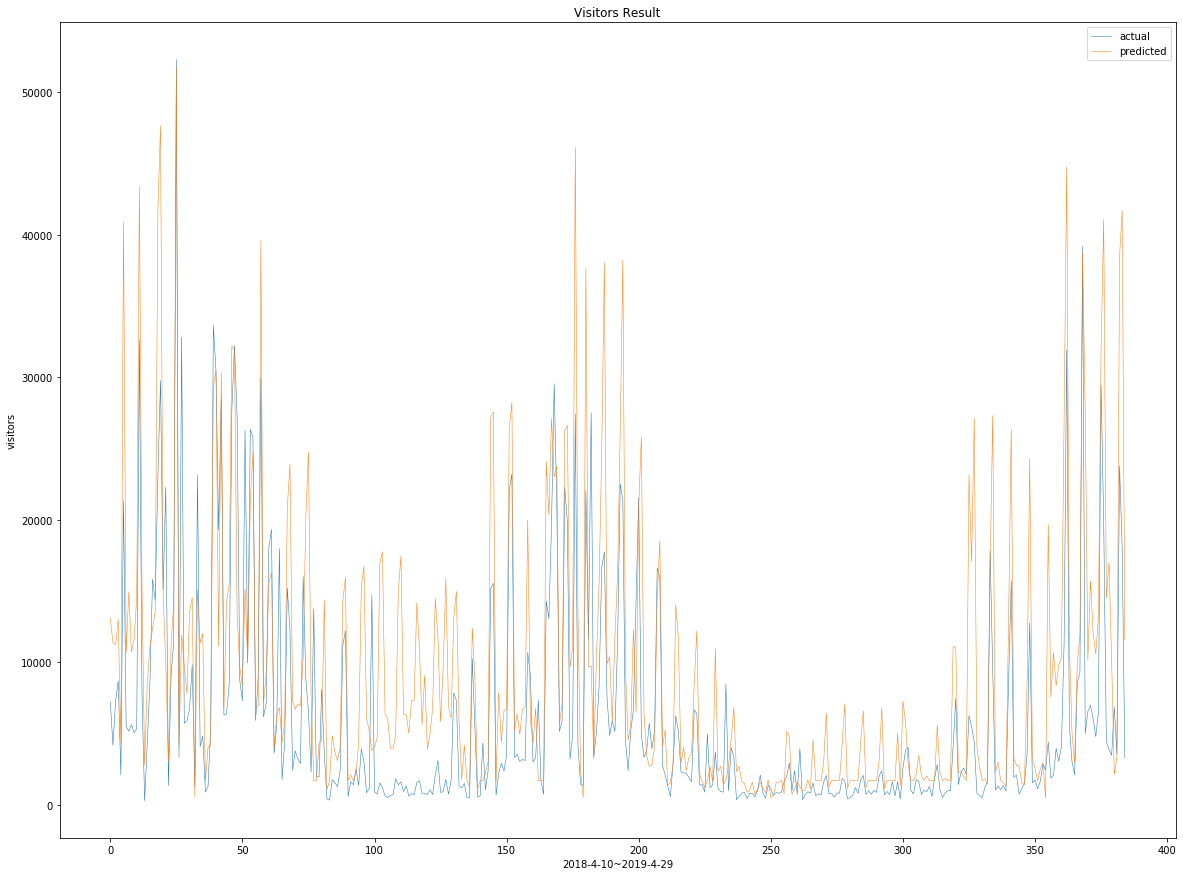

mae :  4322.60619506836
mse :  42215259.9423315
rmse :  6497.32713831861
std : 5683.619223160656


In [5]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 2s 411us/step - loss: 0.0075 - val_loss: 0.0039

Epoch 00001: val_loss improved from inf to 0.00391, saving model to DNNmodel.h5
Epoch 2/70
3847/3847 [==============================] - 0s 40us/step - loss: 0.0039 - val_loss: 0.0053

Epoch 00002: val_loss did not improve from 0.00391
Epoch 3/70
3847/3847 [==============================] - 0s 39us/step - loss: 0.0037 - val_loss: 0.0044

Epoch 00003: val_loss did not improve from 0.00391
Epoch 4/70
3847/3847 [==============================] - 0s 37us/step - loss: 0.0035 - val_loss: 0.0043

Epoch 00004: val_loss did not improve from 0.00391
Epoch 5/70
3847/3847 [==============================] - 0s 39us/step - loss: 0.0034 - val_loss: 0.0037

Epoch 00005: val_loss improved from 0.00391 to 0.00370, saving model to DNNmodel.h5
Epoch 6/70
3847/3847 [==============================] - ETA: 0s - loss: 0.003 - 0s 39


Epoch 00051: val_loss did not improve from 0.00284
Epoch 52/70
3847/3847 [==============================] - 0s 49us/step - loss: 0.0025 - val_loss: 0.0041

Epoch 00052: val_loss did not improve from 0.00284
Epoch 53/70
3847/3847 [==============================] - 0s 60us/step - loss: 0.0026 - val_loss: 0.0045

Epoch 00053: val_loss did not improve from 0.00284
Epoch 54/70
3847/3847 [==============================] - 0s 45us/step - loss: 0.0026 - val_loss: 0.0043

Epoch 00054: val_loss did not improve from 0.00284
Epoch 55/70
3847/3847 [==============================] - 0s 55us/step - loss: 0.0026 - val_loss: 0.0039

Epoch 00055: val_loss did not improve from 0.00284
Epoch 56/70
3847/3847 [==============================] - 0s 47us/step - loss: 0.0026 - val_loss: 0.0045

Epoch 00056: val_loss did not improve from 0.00284
Epoch 57/70
3847/3847 [==============================] - 0s 50us/step - loss: 0.0026 - val_loss: 0.0034

Epoch 00057: val_loss did not improve from 0.00284
Epoch 58/70


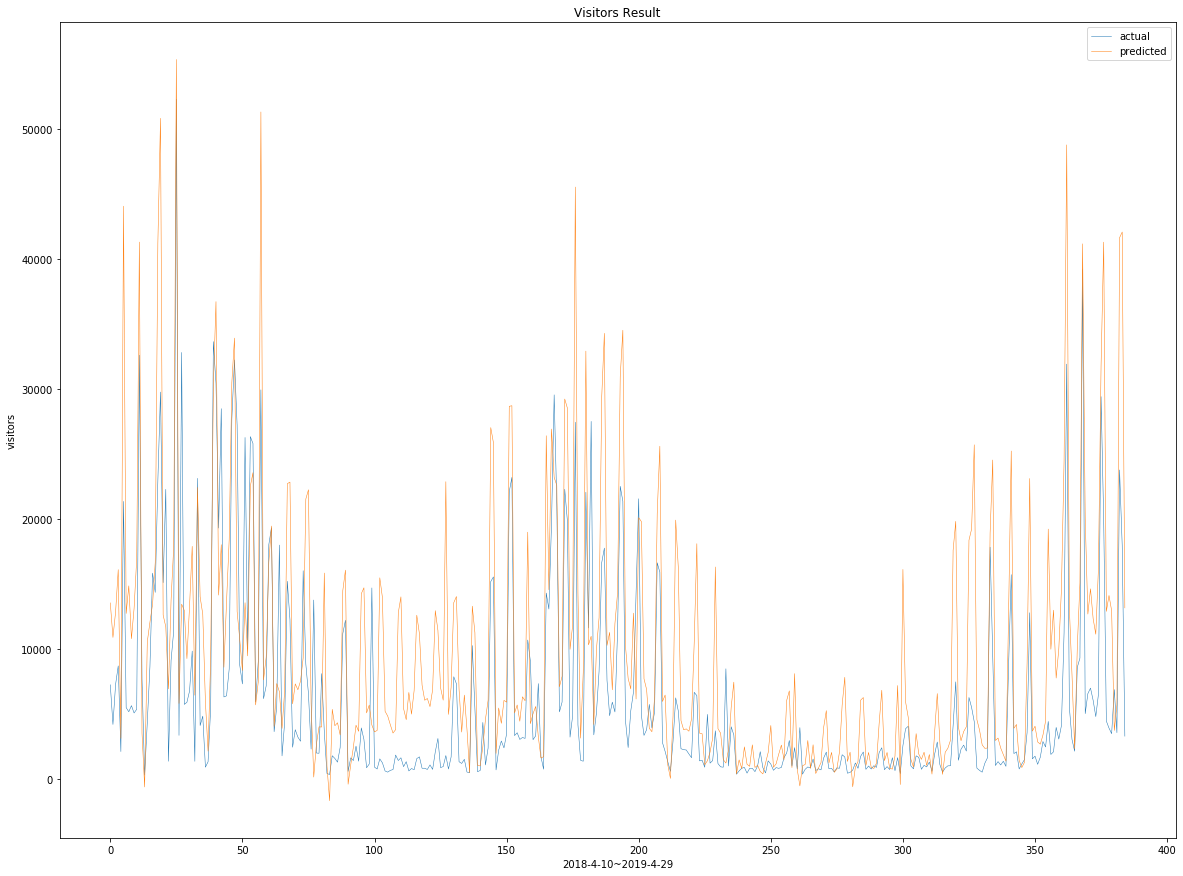

mae :  4769.395823362276
mse :  45746628.23324978
rmse :  6763.62537647154
std : 5707.912588803393


In [6]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', name='Hidden-2'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, kernel_initializer='he_normal', activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model3.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model3.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('DNNmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_sc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('DNNmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_sc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))